# Week 5: Red Wine Quality

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### import data

In [2]:
df = pd.read_csv (r'winequality-red.csv')

In [16]:
 # Separating the target variable 
#x = df[1:] select first row
y = df["quality"]
x = df.iloc[:, 0:-1] # Iloc verwijst naar numbers colums en niet naar de naam.
  
    # Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) 

In [20]:
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(random_state = 100, 
max_depth = 3, min_samples_leaf = 5) 
  
# Performing training

#y_train.describe()
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Decision tree

In [25]:
tree = clf_entropy
tree_fit = tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

In [29]:
score = tree_fit.score(X_test, y_test)
print(score)


0.5645833333333333


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.70      0.56      0.62       204
           6       0.49      0.74      0.59       193
           7       0.48      0.22      0.30        59
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.28      0.25      0.25       480
weighted avg       0.56      0.56      0.54       480



In [36]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[  0   0   1   2   0   0]
 [  0   0   7  10   0   0]
 [  0   0 115  88   1   0]
 [  0   0  40 143  10   0]
 [  0   0   1  45  13   0]
 [  0   0   0   1   3   0]]


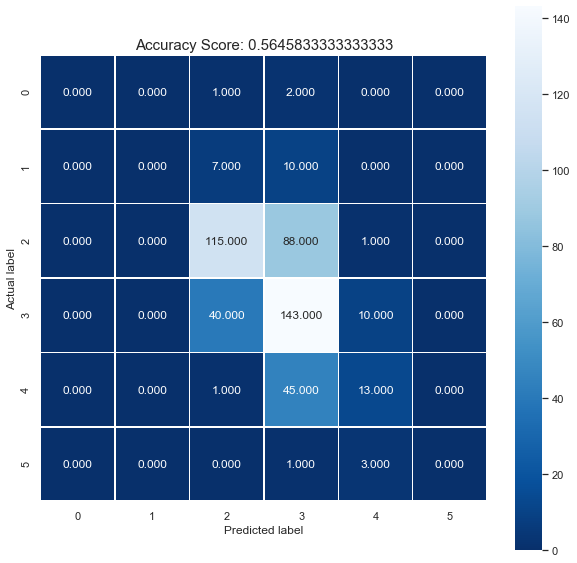

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Logestic Regression

In [32]:
logisticRegr = LogisticRegression(multi_class='auto', max_iter=100000)
logisticRegr.fit(X_train, y_train)
predictionsL = logisticRegr.predict(X_test)

In [28]:
scoreL = logisticRegr.score(X_test, y_test)
print(scoreL)

0.5979166666666667


In [34]:
print(classification_report(y_test, predictionsL))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.68      0.72      0.70       204
           6       0.54      0.64      0.59       193
           7       0.46      0.29      0.35        59
           8       0.00      0.00      0.00         4

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.56      0.60      0.58       480



In [37]:
cm2 = metrics.confusion_matrix(y_test, predictionsL)
print(cm2)

[[  0   0   3   0   0   0]
 [  0   0   9   7   1   0]
 [  0   0 146  57   1   0]
 [  0   0  53 124  16   0]
 [  0   0   3  39  17   0]
 [  0   0   0   2   2   0]]


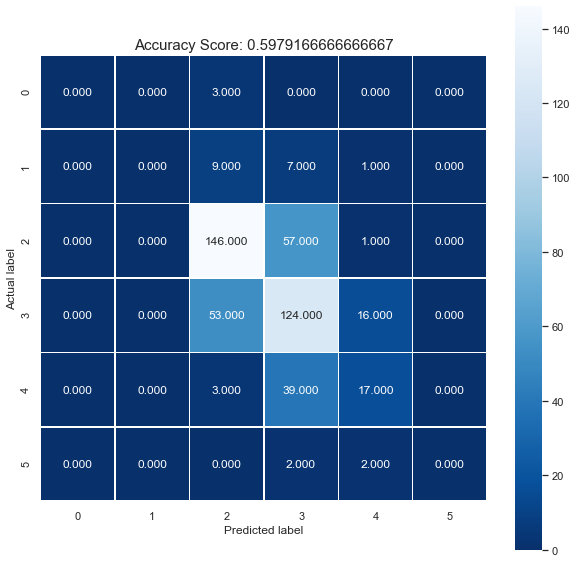

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(scoreL)
plt.title(all_sample_title, size = 15);

## My final thoughts

##### In this exercise we had to determine which of the 2 are better for analyzing our data. Logistic Regression or decision tree. If I compare both of them they both score in the high 50's. In other words they are close to each other. However Logistic Regression was always just a little higher in their score then the Decision tree. Logistic Regression scored 0.59 whilst decision tree scored a 0.56.  So I would rather choose Logistic Regression here